Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech </a>.

<div class="jumbotron">
  <h1 class="display-4">Shallow vs Deep Copy</h1>
  <p class="lead">Sometime, we need copies of the same data to manipulate it. Python offers two way of copying data in a variable. In this chapter, we will explore what each of these can do and when to use them.</p>
  <hr>
  <h3 class="display-6"> Contents </h3>

  <ul style="list-style-type:none">
          <li> <a href="#Variable-Assignment"> &#10070; Variable Assignment </a> </li>
    <li> <a href="#Copy"> &#10070; Copy </a> </li>
     <li> <a href="#Unique-Keys"> &#10070; Unique Keys </a> </li>
      <li> <a href="#Get-Method"> &#10070; Get Method </a> </li>
      <li> <a href="#Iterate-over-Dictionary"> &#10070; Iterate over Dictionary </a> </li>      
          
  </ul>
</div>



<hr>

<div class="alert alert-secondary" id="Variable-Assignment">    
    <span class="topic"> &#10070; Variable Assignment</span>   
</div>

Before, we talk about <kbd>shallow</kbd> vs <kbd>deep</kbd> copying, let's first understand how a variable assignment actually happens in Python. Say, we loaded a variable from an external source (like a database or an external API). We want to keep a copy of the original data, but do further manipulation of a copy of that data. Let's start with a simple integer.

In [14]:
temp = 70 # Degrees F

To make a copy of this data, we can do something like this.

In [11]:
temp_copy = temp

Great. Now, we can independently manipulate the copied variable without worrying about disturbing the original variable. Say, we multiply the copy by 2. 

In [12]:
temp_copy = 70 * 2


Does this affect the original variable ? Ofcourse not. We can verify this by printing it out.

In [13]:
temp

70

As you can see, the original variable <code>temp</code> still remains the same but we were able to independently change the copied variable <copy>temp_copy</copy>

This works as expected because we are working with immutable objects. Here is a quick excerpt from Python's documentation on what happens when you assign one variable to another. 

<div class="text-center">
    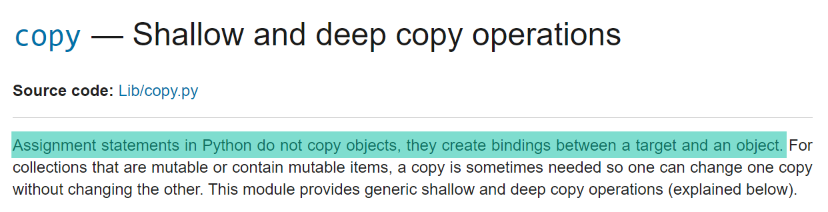
</div>

> Assignment Statements in Python do NOT copy objects. They just create bindings between a target and an object. 

Let's interpret this in the context of the variables that we have created. When we assigned integer 70 to variable temp, here is what Python is doing

- Creates an immutable integer object with value of 70
- Assigns the address of this object to the variable temp

In [15]:
temp = 70
print (id(temp))

2103624356368


This large number is actually a representation of the address in memory of the integer object holding value 70. Some of the standard python objects are immutable. 

- int
- long
- bool
- float
- tuple
- string

<br>

<div class="text-center">
    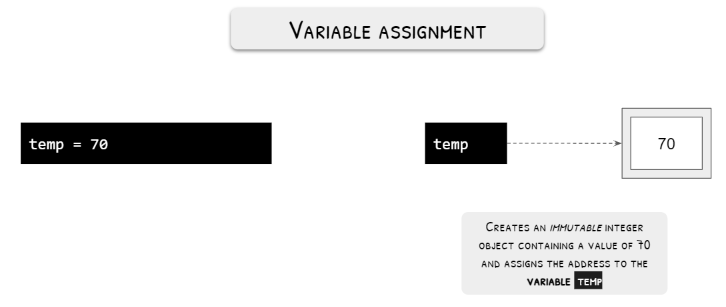
</div>

<br>

Now, what happens when we <kbd>assign</kbd> a new variable to this variable.

In [18]:
temp_copy = temp
print(temp_copy)

70


A new integer object is not created in this case. The new variable <code>temp_copy</code> is just assigned to the same immutable integer object containing a value of 70 that the previous variable <code>temp</code> is assigned to.

<br>

<div class="text-center">
    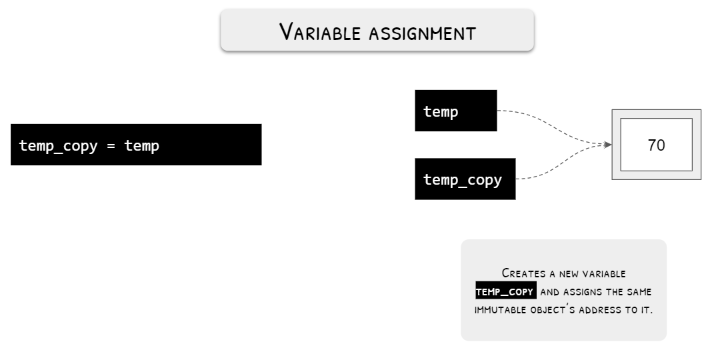
</div>

<br>

We can actually verify this by checking the <kbd>id</kbd> of both these variables.

In [19]:
print(id(temp))
print(id(temp_copy))

2103624356368
2103624356368


Now, what happens when we try to manipulate the new variable ? We have seen that it does NOT affect the original variable. But why is that ? Since, both the variables are referring to the same object in memory, shouldn't the object in memory be affected ? 

This is where <kbd>immutability</kbd> comes in. Since the original object in memory is immutable (because it is an object of type <int>), Python is now forced to create a new integer object in memory and assign it the new value. 

<br>

<div class="text-center">
    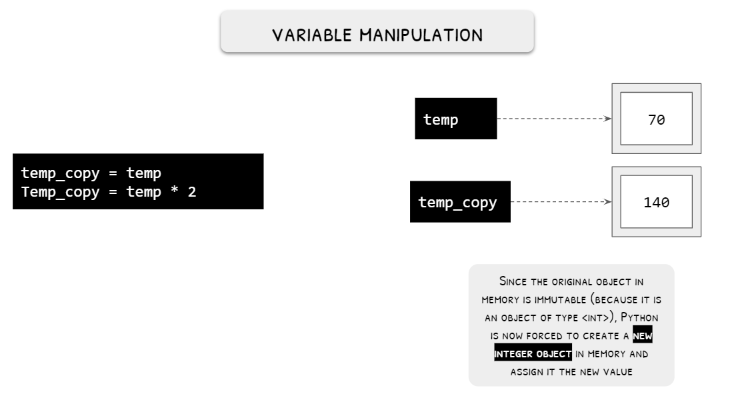
</div>

<br>

We can verify this by checking the addresses of the variables. 

In [20]:
temp_copy = temp * 2

print(id(temp))
print(id(temp_copy))

2103624356368
2103624358608


As you can see, the addresses are different now. This applies to all immutable objects described above (int, float, string, tuple etc). What about mutable objects ?

<div class="alert alert-light" id="Variable-Assignment">    
    <span class="topic"> Mutable Objects</span>   
</div>

Lists, Dictionaries, Sets are examples of mutable objects - meaning, they can be changed without actually changing the object in memory. 

In [26]:
temp = 70
print (id(temp))

temp = temp * 2
print(id(temp))

2103624356368
2103624358608


Since the variable <code>temp</code> refers to an immutable object, manipulating it will result in a new value and hence a new object will be created in memory and assigned to it. 

<br>

<div class="text-center">
    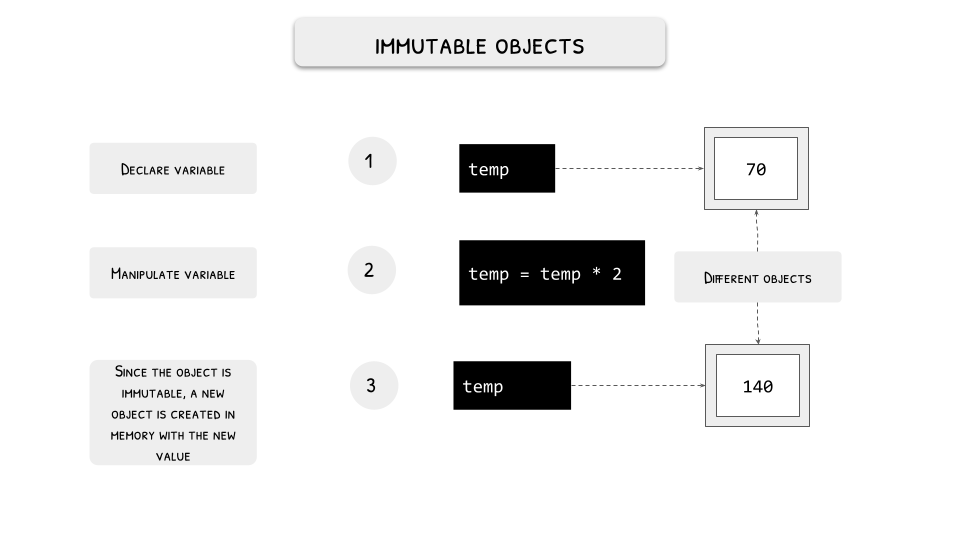
</div>

<br>

However, for immutable objects, the object in memory can be changed. So, there is no need to create a new object. The existing object is modified. That is why you see that the address of mutable objects like lists is not changed by Python - because the variable temp_list below is still referring to the same object in memory inspite of the append operation. 

In [25]:
temp_list = []
print(id(temp_list))

temp_list.append(70)
print(id(temp_list))

temp_list.append(140)
print(id(temp_list))

2103699009664
2103699009664
2103699009664


<br>

<div class="text-center">
    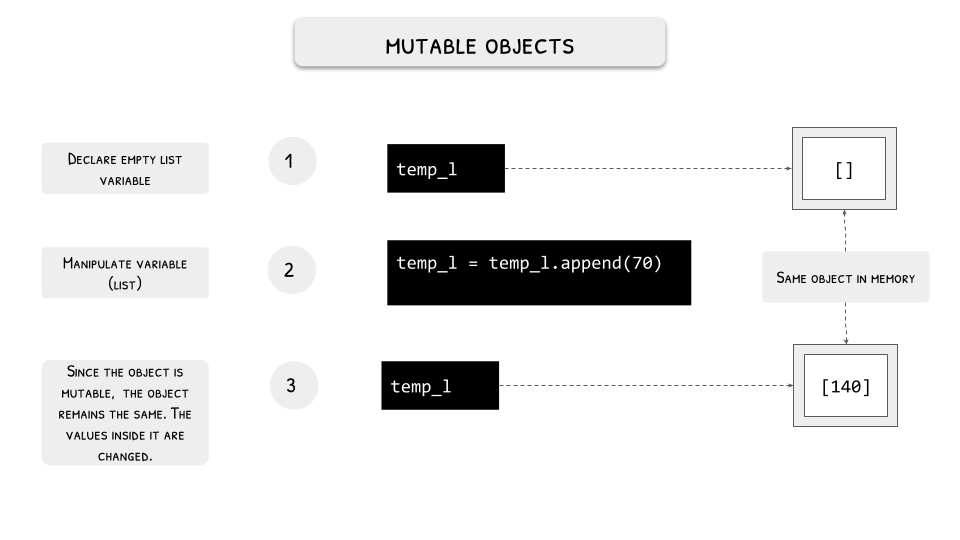
</div>

<br>

Now, what happens when a new variable is assigned to this mutable object ? Do changes in the original object reflect in the new variable ? Let's see. 

Let's declare a variable <code>temp</code> , which is a list containing 2 values.

In [27]:
temp = [70,140]

Let's assign this variable to a new variable <code>temp_copy</code>

In [28]:
temp_new = temp

From our experience with mutable variables above, we know that both these variables refer to the same object in memory. So, naturally, changes to the original variable should be reflected in the assigned variable. Let's try it.

In [29]:
temp.append(210)

temp_new

[70, 140, 210]

So far so good. This is to be expected. Now, what if we want to make a copy of temp and manipulate it independently of the original variable ? This is where the concept of <kbd>copy</kbd> comes in. 

<hr>

<div class="alert alert-secondary" id="Copy">    
    <span class="topic"> &#10070; Copy</span>   
</div>

We have learnt above that we can't make copies of mutable objects by just assigning one to another. So, how do we copy objects so that we can manipulate them independently ? 

<div class="alert alert-light" id="constructor">    
    <span class="topic">1. Constructor</span>   
</div>

We can use the constructor to create a new object of the same type and values. For example, here is the same list.

In [30]:
temp = [70,140]

Using the <kbd>list</kbd> constructor, we can create a new object of type list with the same values as the one we are referring to.

In [31]:
temp_copy = list(temp)
temp_copy

[70, 140]

Simple enough - let's also verify that these are two different objects.

In [32]:
print(id(temp))
print(id(temp_copy))

2103699092352
2103698938048


Since the ids are different, we know that the list constructor has created a new object altogether. Can we now manipulate them independently ? We should be, right ? 

In [34]:
temp.append(210)

In [35]:
print (temp)
print (temp_copy)

[70, 140, 210]
[70, 140]


Excellent !! We are now able to make copies of variables and manipulate them independently. Let's explore one more method of doing this before stepping into the problem of shallow vs deep copy problem.

<div class="alert alert-light" id="constructor">    
    <span class="topic">2. copy library</span>   
</div>

Python provides a standard library called <kbd>copy</kbd> which can do the same thing for us (and much more as we will see in the next section). Here is what the documentation says. 

<br>
<div class="text-center">
    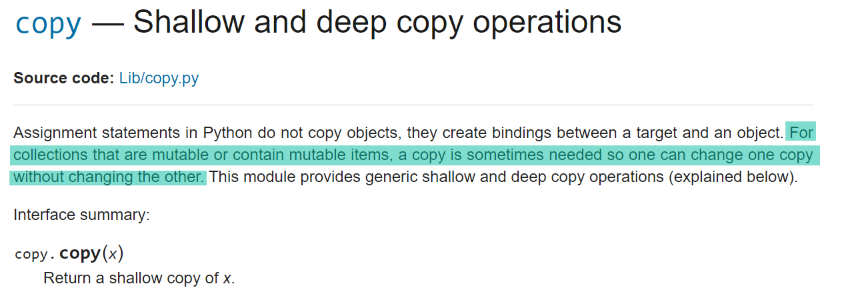
</div>

<br>

> For collections that are mutable (ex., lists), a copy is sometimes needed so one can change one copy without changing the other. 

<br>

This is actually very similar to the constructor method described above. Let's start with the same list.

In [36]:
temp = [70,140]

This time, instead of using the constructor to create a new list, let's use the copy library.

In [38]:
import copy

temp_copy = copy.copy(temp)

Now, let's verify that these are in fact different objects. 

In [40]:
print(id(temp))
print(id(temp_copy))

2103698872640
2103698937280


and that they can be manipulated independently.

In [41]:
temp.append(210)

print (temp)
print (temp_copy)

[70, 140, 210]
[70, 140]


<br>

<div class="text-center">
    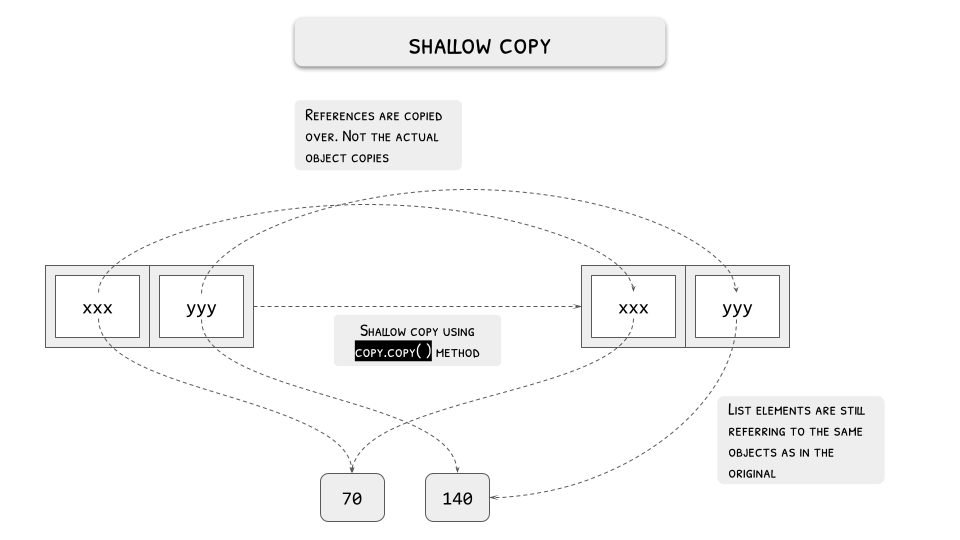
</div>

<br>

<div class="text-center">
    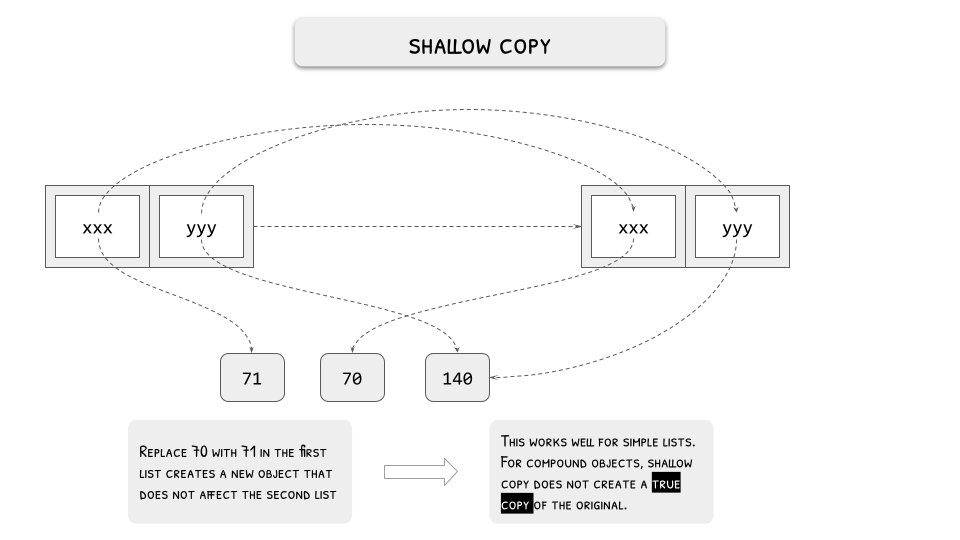
</div>

<br>

Yay !! We can now copy mutable objects. This method of copying objects is called as <kbd>shallow</kbd> copy. 

<div class="alert alert-light" id="problem-with-shallow-copy">    
    <span class="topic">Problem with Shallow Copy</span>   
</div>

However, there is a problem with shallow copy. To understand this better, let's take a more elaborte example. Say, we have a compound list - a list of lists. You can take any other elaborate 2-level data structure to follow this scenario.

In [42]:
temp = [[70,140], [60,120]]

temp_copy = copy.copy(temp)

Python's <kbd>copy</kbd> method only does a <kbd>shallow</kbd> copy of the original. What this means is that, although a new list object is created, the objects inside the list are just referenced not copied. Let's illustrate this by changing one of the elements in the first list object inside the temp list. 

In [43]:
id(temp[0])

2103698979264

In [44]:
id(temp_copy[0])

2103698979264

Both of these list objects refer to the same address so far. Let's do the change now.

In [45]:
temp[0][0] = 71

In [47]:
id(temp[0])

2103698979264

In [48]:
id(temp_copy[0])

2103698979264

The inside list objects still refer to the same object in memory. What this means is that, we are essentially manipulating the same data because,we don't have a full copy of the objects in the list. We only have references. 

In [46]:
print(temp)
print(temp_copy)

[[71, 140], [60, 120]]
[[71, 140], [60, 120]]


As you can see, when the first list temp was manipulated, the copied list temp_copy also got manipulated. However, if you do any manipulation at the root level of the object, like adding a new element to the original list, it does not get reflected in the copied list. 

In [49]:
temp.append(100)

print(temp)
print(temp_copy)

[[71, 140], [60, 120], 100]
[[71, 140], [60, 120]]


Why is this happening ? Let's refer to the documentation once again. 

<br>

<div class="text-center">
    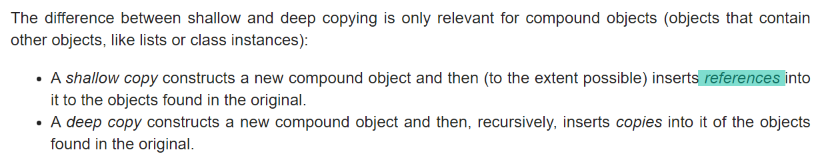
</div>

<br>

> A shallow copy constructs a new compound object and then inserts <kbd>references</kbd> into it to the objects found in the original.

The documentation explicity states that a <kbd>shallow</kbd> copy only inserts references of the original. We have to understand here that objects can be very deeply nested. For example, there could be a list of list of list of lists. In cases like this, how do we tell Python that we need to copy all of the levels of data recursively and create a new copy ? This is where deep copy comes in.

<br>

<div class="text-center">
    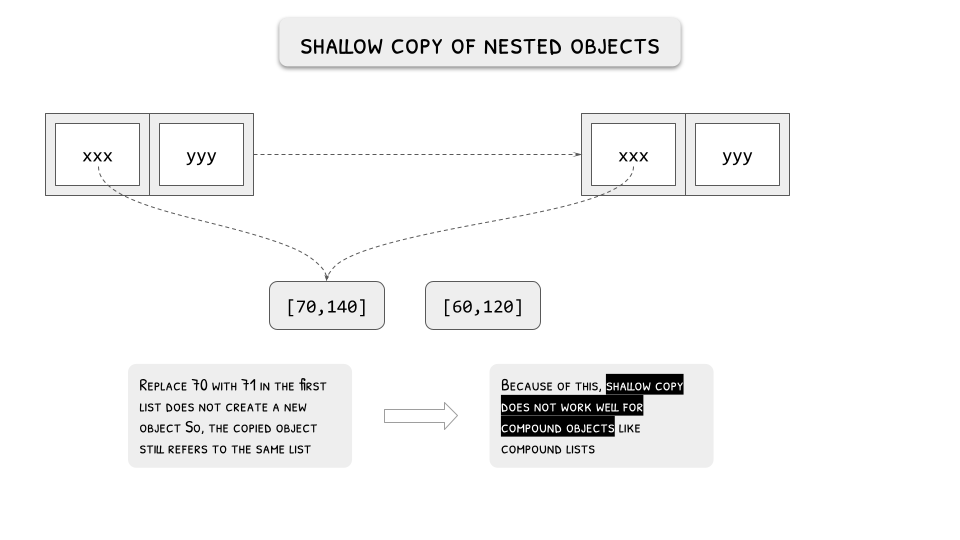
</div>

<br>

<hr>

<div class="alert alert-secondary" id="Deep-Copy">    
    <span class="topic"> &#10070; Deep-Copy</span>   
</div>

<br>

The key to understand <kbd>deep</kbd> copy are the words

- recursive and
- copies

Look at what the documentation says.

<div class="text-center">
    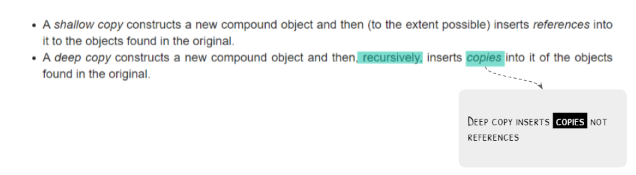
</div>

<br>

So, when a compound object like a list of lists is <kbd>deep</kbd> copied, copies of the elements are used to create the new list as opposed to <kbd>shallow</kbd> that only copies references to the elements inside the list. 

<br>

<div class="text-center">
    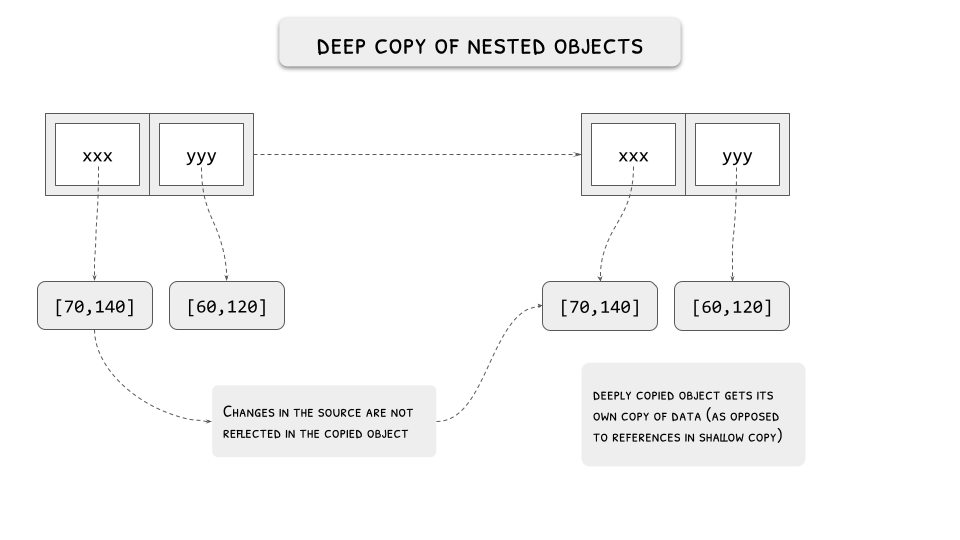
</div>

<br>

In [51]:
temp = [[70,140], [60,120]]

temp_copy = copy.deepcopy(temp)

In [52]:
temp[0][0] = 71

print(temp)
print(temp_copy)

[[71, 140], [60, 120]]
[[70, 140], [60, 120]]


Also, compound objects can be deeply nested. So, the <kbd>deepcopy</kbd> method does this copy <kbd>recursively</kbd>, so that multiple levels of data can be "copied" as opposed to being just "referenced".

In [53]:
temp = [[[70,140], [60,120]],[[20,40],[30,60]]]

temp_copy = copy.deepcopy(temp)

In [54]:
temp[0][0][0] = 71

print(temp)
print(temp_copy)

[[[71, 140], [60, 120]], [[20, 40], [30, 60]]]
[[[70, 140], [60, 120]], [[20, 40], [30, 60]]]


In [1]:
# import bootstrap
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen("https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/css/bootstrap.min.css")
HTML('<style>' + html.read().decode('utf-8') + '</style>')
# bootstrap_icons = urlopen("https://cdn.jsdelivr.net/npm/bootstrap-icons@1.4.0/font/bootstrap-icons.css")
# HTML('<style>' + bootstrap_icons.read().decode('utf-8') + '</style>')

In [2]:
# Custom css classes for text highlighting (based on bootstrap.css)

from IPython.core.display import HTML
HTML("""
<style>

kbd { 
    background-color : black !important; 
    font-size : unset !important
}

.yellow { 
    background-color : #fff3cd !important; 
    color : black !important 
}

code { 
    border-radius : .2rem;
    background-color : white !important;
    border : solid 1px black !important
}

.jumbotron {
    background-color : #e9ecef;
    padding : 2rem 1rem;
    border-radius :.3rem
}

.list-group-flush {
    background-color : #e2e3e5 !important;
    padding-left : 0em !important;
}

.list-group-item {
    background-color : #e2e3e5; !important;
}

img {
    box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19) !important;
}

.bookmark {
    box-shadow : none !important;
    padding-bottom : .5rem !important;
}

.topic {
    font-size : 1.25rem !important;
}

.alert-info {
    background-color : #d1ecf1 !important;
    border-color : #bee5eb !important;
}

</style>
""")

In [3]:
# Make the notebook printer friendly by removing the prompts at the left of the code sections.
from IPython.core.display import HTML
HTML("""
<style>

.prompt { display : none;  } 

.jp-InputPrompt {
    color : white !important;
}

.jp-InputArea-prompt {
    color : white !important;
}
.jp-OutputPrompt{
    color : white !important;
}
.jp-OutputArea-prompt{
    color : white !important;
}

</style>
""")